Threshold：100
nonmaxSuppression：True
neighborhood：2
Total Keypoints with nonmaxSuppression：21
Total Keypoints without nonmaxSuppression：119


/home/pxl/miniconda3/envs/tissue/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/pxl/miniconda3/envs/tissue/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/pxl/miniconda3/envs/tissue/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21152 (\N{CJK UNIFIED IDEOGRAPH-52A0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/pxl/miniconda3/envs/tissue/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20837 (\N{CJK UNIFIED IDEOGRAPH-5165}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/pxl/miniconda3/envs/tissue/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 38750 (\

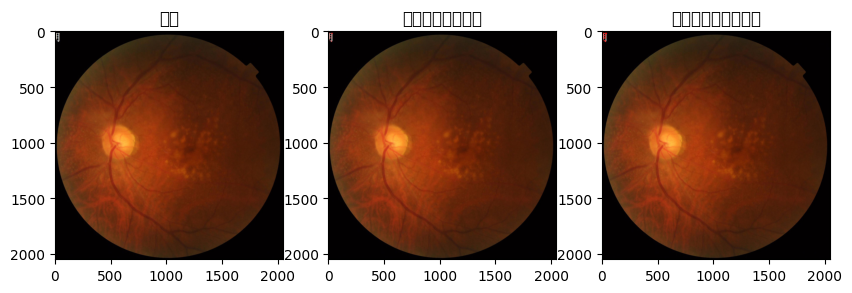

In [1]:
import numpy as np
import cv2 as cv  
from matplotlib import pyplot as plt

# 1.读取图像
# 1. 读取图像
image_path = '/home/pxl/myProject/血管分割/RawData/FIVES-rawData/train/Original/51_A.png'  # 确保路径正确
image = cv.imread(image_path)

# 检查图像是否加载成功
if image is None:
    raise ValueError(f"图像未能加载成功，请检查路径是否正确: {image_path}")

# 2. 转换为灰度图像
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

img = image
# 2.Fast角点检测
# 2.1创建一个Fast对象，传入阀值，注意：可以处理彩色空间图像
fast = cv.FastFeatureDetector_create(threshold=100)

# 2.2检测图像上的关键点
kp = fast.detect(img, None)

# 2.3在图像上绘制关键点
img2 = cv.drawKeypoints(img, kp, None, color=(0, 0, 255))

# 2.4输出默认参数
print("Threshold：{}".format(fast.getThreshold()))
print("nonmaxSuppression：{}".format(fast.getNonmaxSuppression()))
print("neighborhood：{}".format(fast.getType()))
print("Total Keypoints with nonmaxSuppression：{}".format(len(kp)))

# 2.5关闭非极大值抑制
fast.setNonmaxSuppression(0)
kp = fast.detect(img, None)

print("Total Keypoints without nonmaxSuppression：{}".format(len(kp)))

# 2.6绘制为进行非极大值抑制效果
img3 = cv.drawKeypoints(img, kp, None, color=(0, 0, 255))

# 3.绘制图像
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 8), dpi=100)
axes[0].imshow(img[:, :, ::-1])
axes[0].set_title("原图")
axes[1].imshow(img2[:, :, ::-1])
axes[1].set_title("加入非极大值抑制")
axes[2].imshow(img3[:, :, ::-1])
axes[2].set_title("未加入非极大值抑制")
plt.show()


Threshold：200
nonmaxSuppression：True
neighborhood：2
Total Keypoints with nonmaxSuppression：368
Total Keypoints without nonmaxSuppression：1714


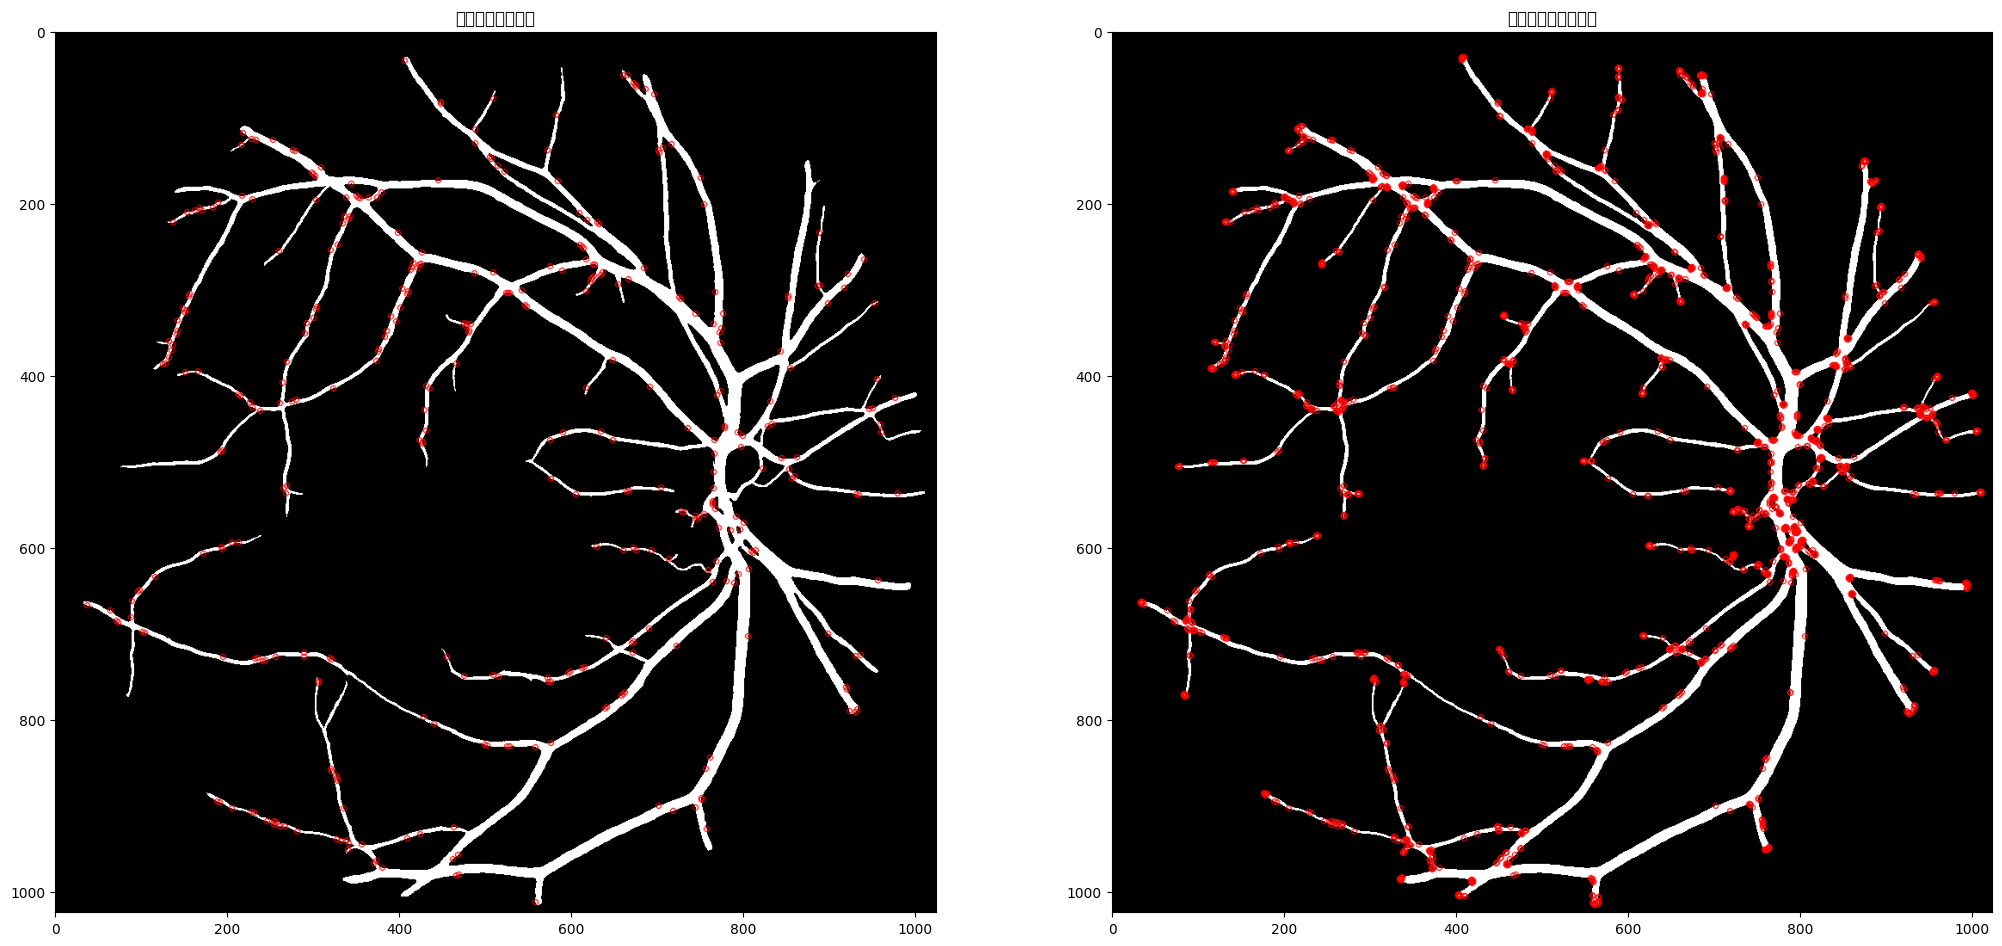

In [10]:
# 读取第二张图像
image_path2 = '/home/pxl/myProject/血管分割/molong-深度插值/molong-resource/true_3044_e03e0573e1ea98fe3f48.png'  # 确保路径正确
image2 = cv.imread(image_path2)

# 检查图像是否加载成功
if image2 is None:
    raise ValueError(f"图像未能加载成功，请检查路径是否正确: {image_path2}")

# 转换为灰度图像
gray_image2 = cv.cvtColor(image2, cv.COLOR_BGR2GRAY)

# Fast角点检测
fast_type = cv.FAST_FEATURE_DETECTOR_TYPE_9_16  # 选择邻域类型

fast2 = cv.FastFeatureDetector_create(threshold=200,type=fast_type)
kp2 = fast2.detect(image2, None)
img4 = cv.drawKeypoints(image2, kp2, None, color=(0, 0, 255))

# 输出默认参数
print("Threshold：{}".format(fast2.getThreshold()))
print("nonmaxSuppression：{}".format(fast2.getNonmaxSuppression()))
print("neighborhood：{}".format(fast2.getType()))
print("Total Keypoints with nonmaxSuppression：{}".format(len(kp2)))

# 关闭非极大值抑制
fast2.setNonmaxSuppression(0)
kp2 = fast2.detect(image2, None)
print("Total Keypoints without nonmaxSuppression：{}".format(len(kp2)))
img5 = cv.drawKeypoints(image2, kp2, None, color=(0, 0, 255))

# 绘制图像
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 15), dpi=100)
axes[0].imshow(img4[:, :, ::-1])
axes[0].set_title("加入非极大值抑制")
axes[1].imshow(img5[:, :, ::-1])
axes[1].set_title("未加入非极大值抑制")
plt.show()

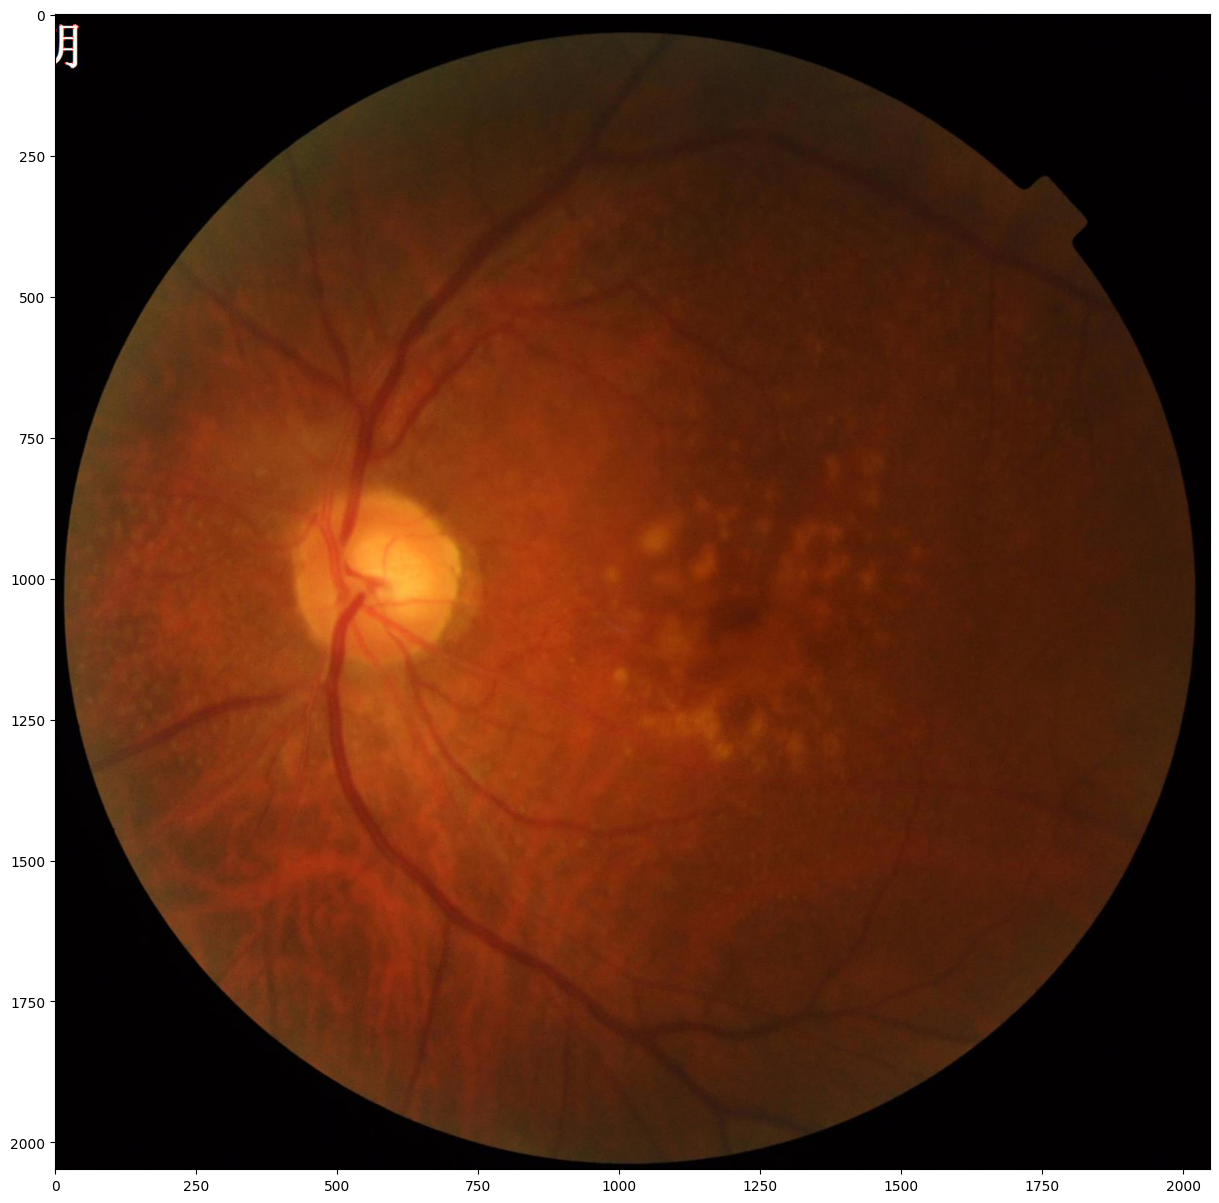

In [26]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
 
img = cv.imread('/home/pxl/myProject/血管分割/RawData/FIVES-rawData/train/Original/51_A.png')  # 确保路径正确
 
# img = cv.imread("/home/pxl/myProject/血管分割/molong-深度插值/molong-resource/true_3044_e03e0573e1ea98fe3f48.png", cv.IMREAD_COLOR)
#转换为灰度图
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
 
#焦点检测
#1. cornerHarris函数要求的输入是float32，首先通过numpy.float32进行转换
img_gray = np.float32(img_gray)
#2. 使用cornerHarris进行焦点检测
#   cv.(src=gray, blockSize, ksize, k, dst=None, borderType=None)
#   src - float32类型的灰度图像数据
#   blockSize - 焦点检测的窗口大小
#   ksize: sobel算子卷积核大小
#   k: Harris算法中的的k值，[0.04,0.06]
#   参考资料：https://blog.csdn.net/wsp_1138886114/article/details/90415190
results = cv.cornerHarris(img_gray, 2, 3, 0.04)
#设置阈值，大于阈值的角点用绿色标注
img[results > 0.001 * results.max()] = [0, 0, 255]
#图像显示
plt.figure(figsize=(25, 15))
plt.imshow(img[:,:,::-1])



/home/pxl/miniconda3/envs/tissue/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/pxl/miniconda3/envs/tissue/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24449 (\N{CJK UNIFIED IDEOGRAPH-5F81}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/pxl/miniconda3/envs/tissue/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26816 (\N{CJK UNIFIED IDEOGRAPH-68C0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/pxl/miniconda3/envs/tissue/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


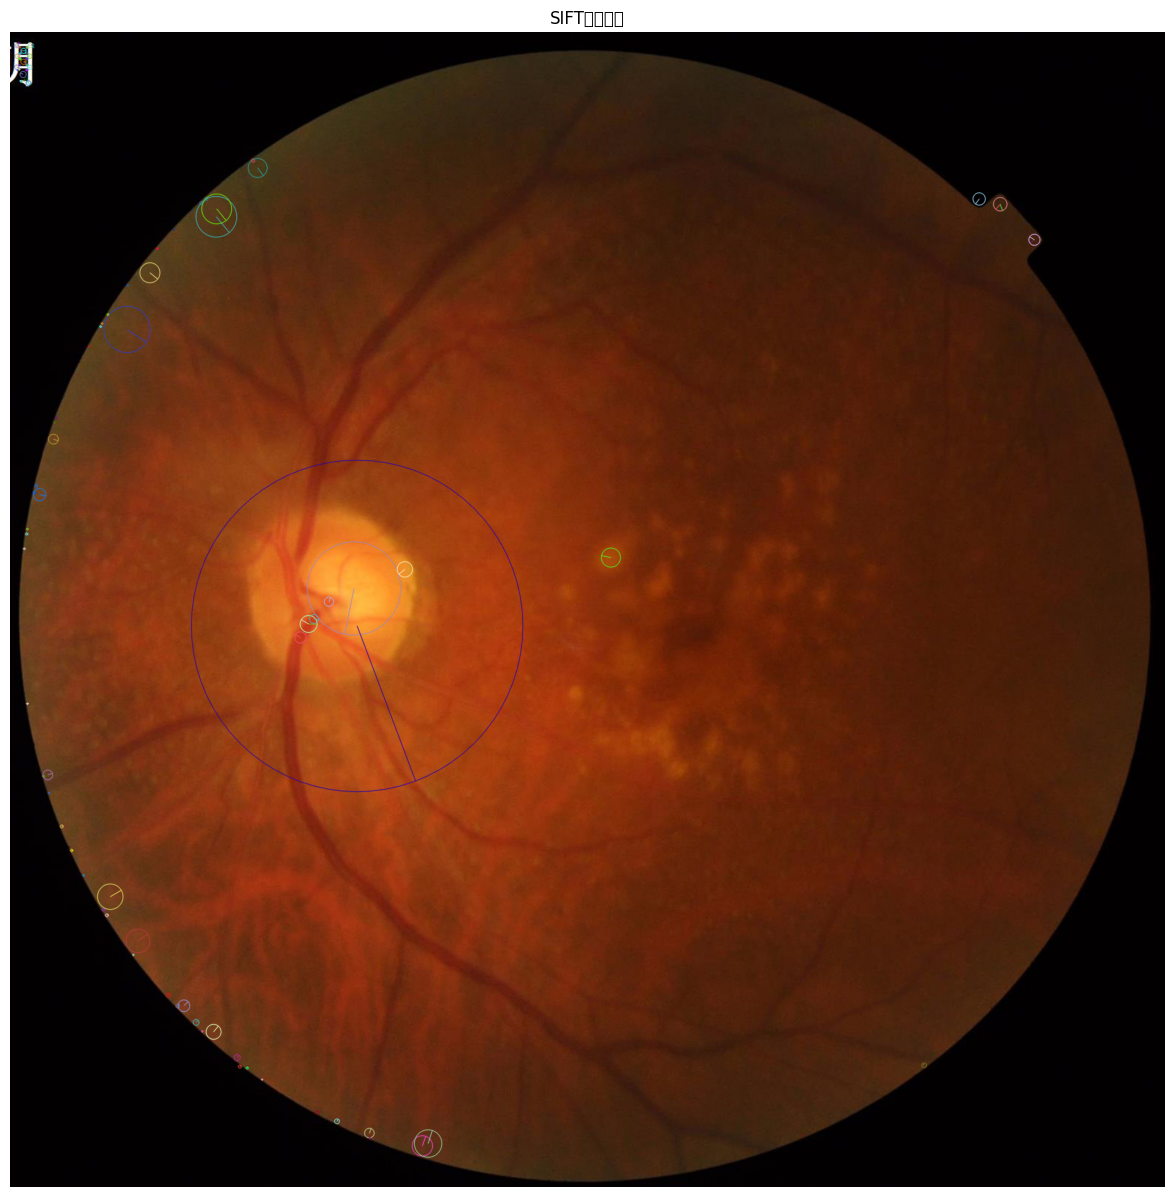

In [25]:
import cv2 as cv
import matplotlib.pyplot as plt

# 读取图像并转换为灰度图
img = cv.imread('/home/pxl/myProject/血管分割/RawData/FIVES-rawData/train/Original/51_A.png')  # 确保路径正确
# img = cv.imread("/home/pxl/myProject/血管分割/molong-深度插值/molong-resource/true_3044_e03e0573e1ea98fe3f48.png", cv.IMREAD_COLOR)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# 创建SIFT检测器
sift = cv.SIFT_create()

# 检测特征点并计算描述子
keypoints, descriptors = sift.detectAndCompute(gray, None)

# 绘制特征点
img_with_keypoints = cv.drawKeypoints(img, keypoints, None, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# 显示结果
plt.figure(figsize=(25, 15))
plt.imshow(cv.cvtColor(img_with_keypoints, cv.COLOR_BGR2RGB))
plt.title('SIFT特征检测')
plt.axis('off')
plt.show()

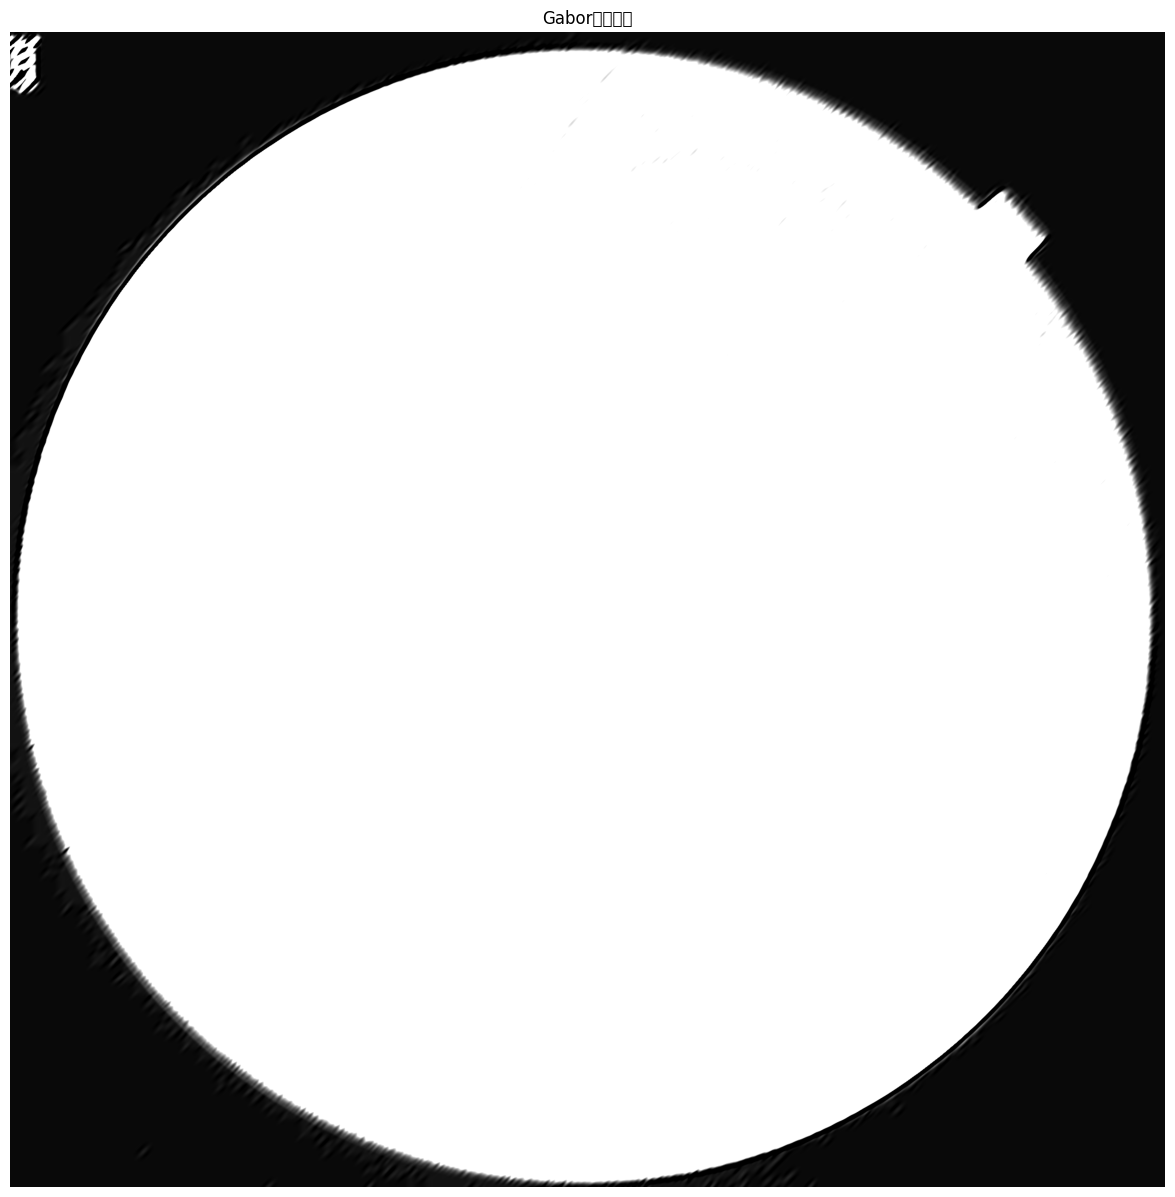

In [24]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# 读取图像并转换为灰度图
img = cv.imread('/home/pxl/myProject/血管分割/RawData/FIVES-rawData/train/Original/51_A.png')  # 确保路径正确
# img = cv.imread("/home/pxl/myProject/血管分割/molong-深度插值/molong-resource/true_3044_e03e0573e1ea98fe3f48.png", cv.IMREAD_COLOR)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# 定义Gabor滤波器参数
ksize = 31  # 滤波器尺寸
sigma = 4.0  # 高斯函数标准差
theta = np.pi / 4  # 滤波器方向
lambd = 10.0  # 波长
gamma = 0.5  # 空间纵横比
psi = 0  # 相位偏移

# 创建Gabor滤波器
kernel = cv.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, psi, ktype=cv.CV_32F)

# 应用滤波器
filtered_img = cv.filter2D(gray, cv.CV_8UC3, kernel)

# 显示结果
plt.figure(figsize=(25, 15))

plt.imshow(filtered_img, cmap='gray')
plt.title('Gabor滤波结果')
plt.axis('off')
plt.show()